### Ordinary least-squares

In [9]:
import pandas as pd
import numpy as np

# create a dataset 
data = pd.DataFrame({'PricePerSquare': [20,30,40,50,60,70,83,91,96,100,],
                     'Area': [300,340,370,400,490,540,570,615,711,890]})

df = pd.DataFrame(data)

# calculate m 
x_bar = df['PricePerSquare'].mean()
y_bar = df['Area'].mean()
print(x_bar , y_bar)

64.0 522.6


Slope: 6.042451542451542
Intercept: 135.88310128310133
Root Mean Squared Error: 60.29692991380039


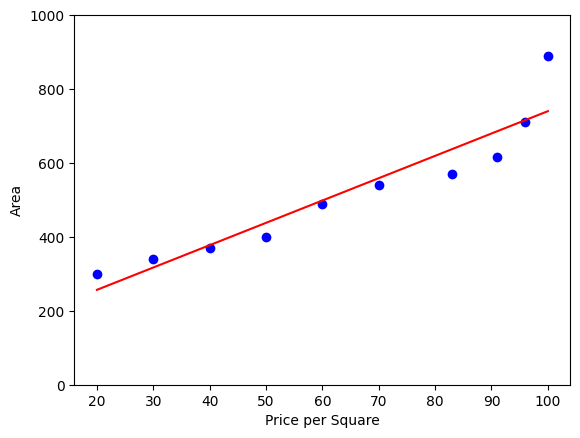

In [56]:

# Calculate the slope (beta_1)
numerator = np.sum((df['PricePerSquare'] - x_bar) * (df['Area'] - y_bar))
denominator = np.sum((df['PricePerSquare'] - x_bar) ** 2)
slope = numerator / denominator

# Calculate the intercept (beta_0)
intercept = y_bar - (slope * x_bar)

print("Slope:", slope)
print("Intercept:", intercept)

# Predictions
df['Predicted_Area'] = intercept + slope * df['PricePerSquare']

import matplotlib.pyplot as plt
plt.scatter( df['PricePerSquare'],df['Area'],color = 'blue')
plt.plot(df['PricePerSquare'],df['Predicted_Area'], color = 'red')
plt.ylim(0,1000);
plt.ylabel('Area')
plt.xlabel('Price per Square')

sse = ((df['Predicted_Area'] - df['Area']) ** 2).sum()
rmse = np.sqrt(sse/len(df))
print('Root Mean Squared Error:', rmse)

### Stochastic Gradient Descent

Iteration 100, RMSE: 402.08896703406845
Iteration 200, RMSE: 365.3181542834502
Iteration 300, RMSE: 330.9512289168542
Iteration 400, RMSE: 304.2002473320401
Iteration 500, RMSE: 280.5717004747068
Iteration 600, RMSE: 253.5779848351179
Iteration 700, RMSE: 232.41393584102357
Iteration 800, RMSE: 213.8338712030195
Iteration 900, RMSE: 197.8322720409857
Iteration 1000, RMSE: 181.57142098917055
Iteration 1100, RMSE: 168.52860836176853
Iteration 1200, RMSE: 157.25526568450925
Iteration 1300, RMSE: 144.7668788542151
Iteration 1400, RMSE: 135.41926456207378
Iteration 1500, RMSE: 127.53199896391934
Iteration 1600, RMSE: 121.40324437242114
Iteration 1700, RMSE: 116.29780383112643
Iteration 1800, RMSE: 111.72038085042674
Iteration 1900, RMSE: 106.9252732141195
Iteration 2000, RMSE: 103.08062340352518
Iteration 2100, RMSE: 99.35735001839299
Iteration 2200, RMSE: 95.90697743887198
Iteration 2300, RMSE: 93.1165512192121
Iteration 2400, RMSE: 90.74737708586166
Iteration 2500, RMSE: 89.00389950513001

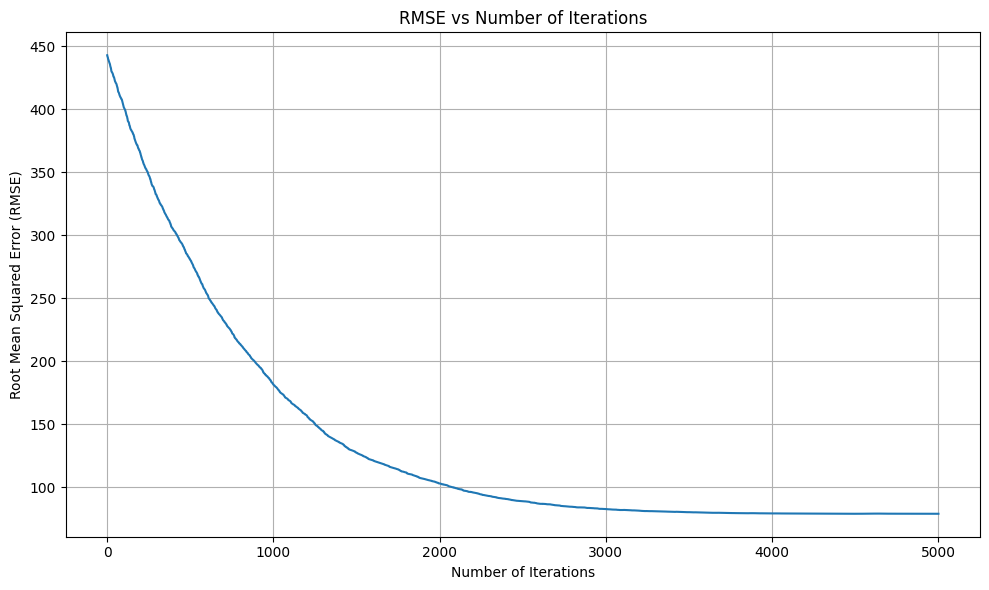

Final Root Mean Squared Error: 79.03634724940945


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a dataset 
data = pd.DataFrame({'PricePerSquare': [20,30,40,50,60,70,83,91,96,100],
                     'Area': [300,340,370,400,490,540,570,615,711,890]})

df = pd.DataFrame(data)

# Initialize parameters
slope = 1.5
intercept = 5
learning_rate = 0.000001
n_iterations = 5000

# Lists to store RMSE values and iteration numbers
rmse_values = []
iteration_numbers = []

# Perform the SGD
for i in range(n_iterations):
    # Select a random data point for each iteration
    random_index = np.random.randint(len(df))
    x_i = df['PricePerSquare'].iloc[random_index]
    y_i = df['Area'].iloc[random_index]

    # Prediction using current slope and intercept
    prediction = slope * x_i + intercept

    # Calculate the gradient
    error = prediction - y_i
    slope_gradient = 2 * error * x_i / len(df)
    intercept_gradient = 2 * error / len(df)

    # Update the slope and intercept
    slope -= learning_rate * slope_gradient
    intercept -= learning_rate * intercept_gradient

    # Calculate RMSE for all points using current slope and intercept
    df['Predicted_Area'] = slope * df['PricePerSquare'] + intercept
    mse = ((df['Predicted_Area'] - df['Area']) ** 2).mean()
    rmse = np.sqrt(mse)
    
    # Store RMSE and iteration number
    rmse_values.append(rmse)
    iteration_numbers.append(i + 1)

    # Optionally, you can print RMSE every 100 iterations
    if (i + 1) % 100 == 0:
        print(f"Iteration {i + 1}, RMSE: {rmse}")

# Print the final slope and intercept
print("Final Slope (after SGD):", slope)
print("Final Intercept (after SGD):", intercept)

# Plot RMSE vs Number of Iterations
plt.figure(figsize=(10, 6))
plt.plot(iteration_numbers, rmse_values)
plt.title('RMSE vs Number of Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Root Mean Squared Error (RMSE)')
# plt.ylim(0,100)
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate and print final RMSE
final_rmse = rmse_values[-1]
print('Final Root Mean Squared Error:', final_rmse)

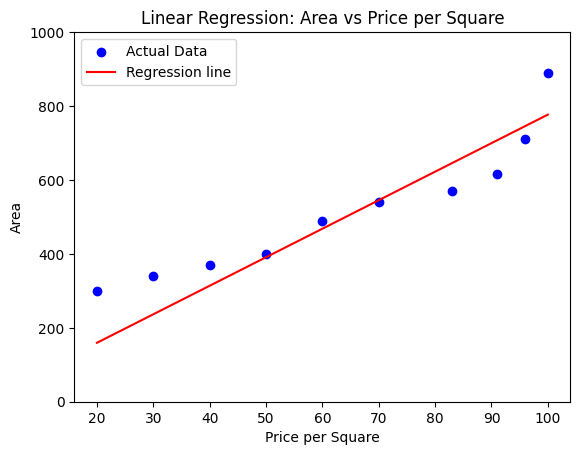

In [64]:
df['Predicted_Area'] = slope*df['PricePerSquare'] + intercept


# Sort the DataFrame by 'PricePerSquare' for continuous line plotting
df = df.sort_values(by='PricePerSquare')

# Plotting
plt.scatter(df['PricePerSquare'], df['Area'], color='blue', label='Actual Data')
plt.plot(df['PricePerSquare'], df['Predicted_Area'], color='red', label='Regression line')
plt.ylim(0, 1000)
plt.ylabel('Area')
plt.xlabel('Price per Square')
plt.legend()
plt.title('Linear Regression: Area vs Price per Square')
plt.show()

### Maximum Likelihood estimaton using OLS

Final Slope (MLE): 6.042451542451542
Final Intercept (MLE): 135.88310128310133
Root Mean Squared Error: 60.29692991380039


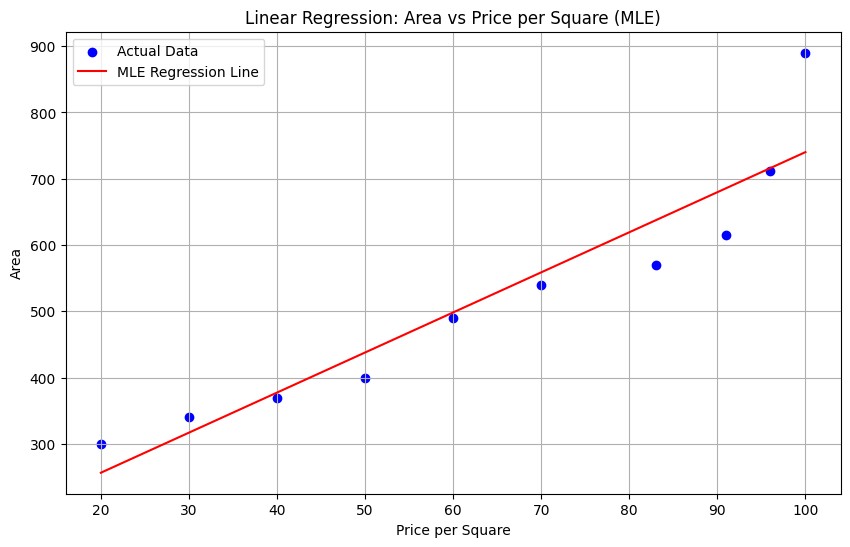

Log-Likelihood: -55.18219722106025


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a dataset 
data = pd.DataFrame({'PricePerSquare': [20,30,40,50,60,70,83,91,96,100],
                     'Area': [300,340,370,400,490,540,570,615,711,890]})

df = pd.DataFrame(data)

# Prepare the data
X = df['PricePerSquare'].values.reshape(-1, 1)
y = df['Area'].values

# Perform MLE (which is equivalent to OLS for linear regression)
model = LinearRegression()
model.fit(X, y)

# Get the parameters
slope = model.coef_[0]
intercept = model.intercept_

# Make predictions
df['Predicted_Area'] = model.predict(X)

# Calculate RMSE
mse = mean_squared_error(df['Area'], df['Predicted_Area'])
rmse = np.sqrt(mse)

# Print the results
print("Final Slope (MLE):", slope)
print("Final Intercept (MLE):", intercept)
print('Root Mean Squared Error:', rmse)

# Plot the data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(df['PricePerSquare'], df['Area'], color='blue', label='Actual Data')
plt.plot(df['PricePerSquare'], df['Predicted_Area'], color='red', label='MLE Regression Line')
plt.title('Linear Regression: Area vs Price per Square (MLE)')
plt.xlabel('Price per Square')
plt.ylabel('Area')
plt.legend()
plt.grid(True)
plt.show()

# Calculate log-likelihood
def log_likelihood(y, y_pred):
    n = len(y)
    mse = np.mean((y - y_pred)**2)
    return -n/2 * (np.log(2*np.pi) + np.log(mse) + 1)

ll = log_likelihood(df['Area'], df['Predicted_Area'])
print('Log-Likelihood:', ll)

### MLE using SGD

Iteration 100, RMSE: 272.38876003988435, Avg Log-Likelihood: -37098.737236566056
Iteration 200, RMSE: 189.04206925914832, Avg Log-Likelihood: -17869.370913423518
Iteration 300, RMSE: 136.7211066140559, Avg Log-Likelihood: -9347.249435419228
Iteration 400, RMSE: 105.36066785669304, Avg Log-Likelihood: -5551.354104137399
Iteration 500, RMSE: 90.65422635808874, Avg Log-Likelihood: -4110.013316825001
Iteration 600, RMSE: 83.10312204254168, Avg Log-Likelihood: -3453.9833851419926
Iteration 700, RMSE: 80.40369615759862, Avg Log-Likelihood: -3233.296116434924
Iteration 800, RMSE: 79.02258000419333, Avg Log-Likelihood: -3123.203013792773
Iteration 900, RMSE: 79.09633241660543, Avg Log-Likelihood: -3129.0338394122787
Iteration 1000, RMSE: 78.93728733598677, Avg Log-Likelihood: -3116.4666045152712
Iteration 1100, RMSE: 78.9683163326548, Avg Log-Likelihood: -3118.9164307403203
Iteration 1200, RMSE: 78.96937798499417, Avg Log-Likelihood: -3119.000268201646
Iteration 1300, RMSE: 78.9372077213177, A

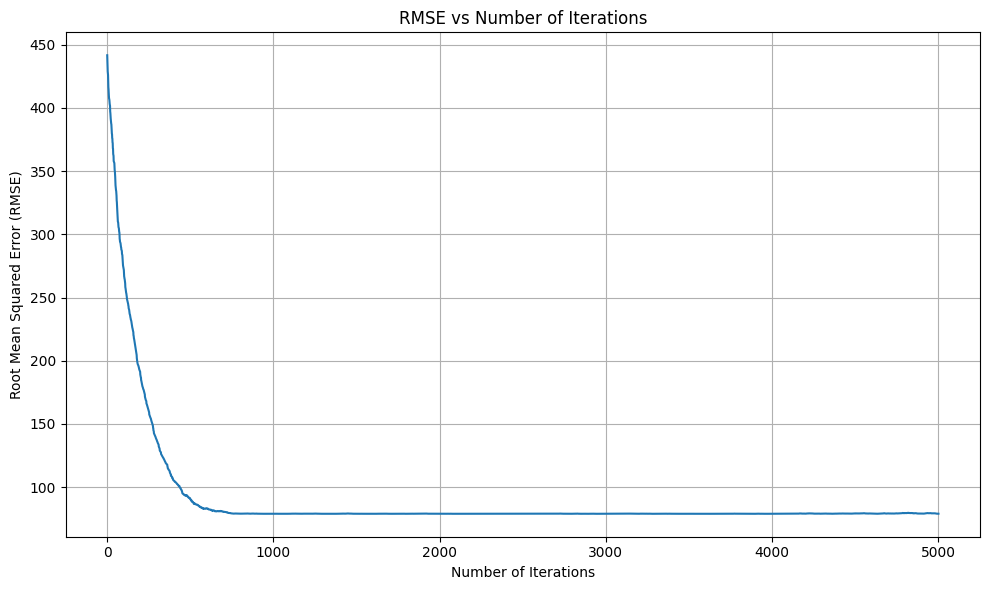

Final Root Mean Squared Error: 78.97483163831541


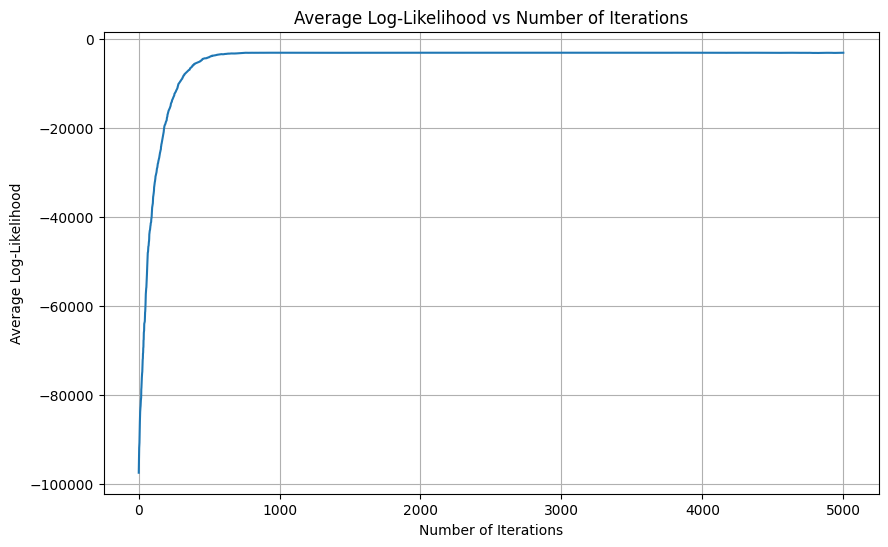

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a dataset 
data = pd.DataFrame({'PricePerSquare': [20,30,40,50,60,70,83,91,96,100],
                     'Area': [300,340,370,400,490,540,570,615,711,890]})

df = pd.DataFrame(data)

# Initialize parameters
slope = 1.5
intercept = 5
learning_rate = 0.000001
n_iterations = 5000


# Lists to store values
rmse_values = []
iteration_numbers = []
log_likelihood_values = []

# Assume σ^2 = 1 for simplicity
sigma_squared = 1

# Perform the SGD
for i in range(n_iterations):
    # Select a random data point
    random_index = np.random.randint(len(df))
    x_i = df['PricePerSquare'].iloc[random_index]
    y_i = df['Area'].iloc[random_index]

    # Prediction
    y_pred = slope * x_i + intercept

    # Calculate log-likelihood for this point
    ll = -0.5 * np.log(2 * np.pi) - 0.5 * np.log(sigma_squared) - (y_i - y_pred)**2 / (2 * sigma_squared)

    # Calculate gradients
    slope_gradient = (y_i - y_pred) * x_i / sigma_squared
    intercept_gradient = (y_i - y_pred) / sigma_squared

    # Update parameters
    slope += learning_rate * slope_gradient
    intercept += learning_rate * intercept_gradient

    # Calculate RMSE and total log-likelihood for all points
    df['Predicted_Area'] = slope * df['PricePerSquare'] + intercept
    mse = ((df['Area'] - df['Predicted_Area']) ** 2).mean()
    rmse = np.sqrt(mse)
    
    total_ll = sum(-0.5 * np.log(2 * np.pi) - 0.5 * np.log(sigma_squared) - 
                   (df['Area'] - df['Predicted_Area'])**2 / (2 * sigma_squared))
    avg_ll = total_ll / len(df)

    # Store values
    rmse_values.append(rmse)
    iteration_numbers.append(i + 1)
    log_likelihood_values.append(avg_ll)

    # Optionally, print values every 100 iterations
    if (i + 1) % 100 == 0:
        print(f"Iteration {i + 1}, RMSE: {rmse}, Avg Log-Likelihood: {avg_ll}")

    
# Print the final slope and intercept
print("Final Slope (after SGD):", slope)
print("Final Intercept (after SGD):", intercept)

# Plot RMSE vs Number of Iterations
plt.figure(figsize=(10, 6))
plt.plot(iteration_numbers, rmse_values)
plt.title('RMSE vs Number of Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Root Mean Squared Error (RMSE)')
# plt.ylim(0,100)
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate and print final RMSE
final_rmse = rmse_values[-1]
print('Final Root Mean Squared Error:', final_rmse)


# Add a plot for log-likelihood
plt.figure(figsize=(10, 6))
plt.plot(iteration_numbers, log_likelihood_values)
plt.title('Average Log-Likelihood vs Number of Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Average Log-Likelihood')
plt.grid(True)
plt.show()